# Load and compile all snowlines and AOIs, plot results

In [1]:
!pip install contextily rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 48.0 MB/s eta 0:00:00


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import seaborn as sns
import contextily as ctx
from tqdm.auto import tqdm
from ast import literal_eval
import sys
from scipy.stats import median_abs_deviation
import string
import matplotlib
from shapely.geometry import Polygon, MultiPolygon

In [3]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Determine settings and load functions

In [4]:
# define path to study-sites/
study_sites_path = '/content/drive/MyDrive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites'

# define path to snow-cover-mapping-application/
base_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application')

# determine whether to save figures to file
save_figures = True

# path to save output figures
figures_out_path = os.path.join(base_path, 'figures')

# Load necessary functions
sys.path.insert(1, os.path.join(base_path, 'functions'))
import model_analyze_utils as f

## Construct and/or update training data

In [5]:
training_data_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'inputs-outputs')
training_data_fn = 'snowline_timeseries_full_training_data_OLD.csv'
training_data_df = f.construct_update_training_data(study_sites_path, training_data_path, training_data_fn)
training_data_df

Number of sites in file = 183
Training dataset already exists in directory, loading...
Adding new sites to training dataset...


  0%|          | 0/13 [00:00<?, ?it/s]

RGI60-01.00570


KeyError: 'datetime'

## Subset the training data: sample conditions for median week of minimum AAR in each subregion

In [ ]:
training_data_subset_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'inputs-outputs')
training_data_subset_fn = 'snowline_timeseries_subset_training_data.csv'
training_data_subset_df = f.subset_training_data(training_data_df, training_data_subset_path, training_data_subset_fn)
training_data_subset_df

Training data subset exists in directory, loading...


,site_name,Date,AAR,ELA_from_AAR_m,Cumulative_Positive_Degree_Days,Cumulative_Snowfall_mwe,Mean_Annual_Air_Temp_Range,Mean_Annual_Precipitation_Max,PA_Ratio,O1Region,...,Area,Zmin,Zmax,Zmed,Slope,Aspect,Hypsometric_Index,Hypsometric_Index_Category,Week,Year
0,Gulkana,2017-08-08,0.218374,2047.740000,359.303035,0.494364,41.578626,0.874576,9.448763,1.0,...,17.567,1162,2438,1858,14.0,172,-1.140053,Equidimensional,32,2017
1,Gulkana,2019-08-08,0.490068,1880.940000,466.440201,0.677443,41.578626,0.874576,9.448763,1.0,...,17.567,1162,2438,1858,14.0,172,-1.140053,Equidimensional,32,2019
2,Gulkana,2019-08-08,0.384614,1931.120000,466.440201,0.677443,41.578626,0.874576,9.448763,1.0,...,17.567,1162,2438,1858,14.0,172,-1.140053,Equidimensional,32,2019
3,Gulkana,2019-08-08,0.453814,1897.320000,466.440201,0.677443,41.578626,0.874576,9.448763,1.0,...,17.567,1162,2438,1858,14.0,172,-1.140053,Equidimensional,32,2019
4,Gulkana,2020-08-04,1.000000,1252.222656,254.612514,0.953177,41.578626,0.874576,9.448763,1.0,...,17.567,1162,2438,1858,14.0,172,-1.140053,Equidimensional,32,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,Sperry,2021-09-23,0.607843,2423.390000,1303.139502,0.976630,47.435399,0.895949,6.630013,2.0,...,1.281,2248,2761,2383,18.9,345,2.971223,Very bottom heavy,38,2021
1412,Sperry,2021-09-25,0.197710,2565.320000,1316.074857,0.976631,47.435399,0.895949,6.630013,2.0,...,1.281,2248,2761,2383,18.9,345,2.971223,Very bottom heavy,38,2021
1413,Sperry,2021-09-25,0.785018,2373.290000,1316.074857,0.976631,47.435399,0.895949,6.630013,2.0,...,1.281,2248,2761,2383,18.9,345,2.971223,Very bottom heavy,38,2021
1414,Sperry,2022-09-25,0.071085,2688.310000,1218.035440,1.040040,47.435399,0.895949,6.630013,2.0,...,1.281,2248,2761,2383,18.9,345,2.971223,Very bottom heavy,38,2022


## Plot terrain parameters and AAR distributions of training data

In [ ]:
# -----Set up figure
plt.rcParams.update({'font.size':14, 'font.sans-serif': 'Arial'})
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax = ax.flatten()
# define settings for each column
columns = ['Area', 'Zmed', 'Hypsometric_Index', 'Aspect', 'Slope']
ranges = [np.arange(0.5, 1000, step=1),    # Areas
          np.arange(500, 3000, step=100),  # Zmeds
          np.arange(-3, 3, step=0.2),     # HIs
          np.arange(0, 360, step=20),      # Aspects
          np.arange(5, 30, step=1)]        # Slopes
units = ['km$^2$', 'm.a.s.l.', 'm/m', 'degrees', 'degrees']
colors = ['k', 'g', 'c', 'r', 'm', 'b']

# -----Iterate over terrain parameters
i=0
for column, unit, color in list(zip(columns, units, colors)):
    # divide column into range of values
    # range = np.linspace(training_data_subset_df[column].min(), training_data_subset_df[column].max(), num=10)
    # meds = np.zeros(10)
    # plot results
    ax[i].plot(training_data_subset_df[column], training_data_subset_df['AAR'], '.', color=color)
    ax[i].set_ylim(0, 1)
    ax[i].grid()
    ax[i].set_title(column.replace('_', ' '))
    ax[i].set_ylabel('[' + unit + ']')
    ax[i].set_xlabel('AAR')

    i+=1

fig.delaxes(ax[-1])
fig.tight_layout()
plt.show()


## Plot a few AAR time series as an example

In [ ]:
# define sites to plot
site_names = ['Gulkana', 'LemonCreek', 'SouthCascade']

# set up figure
plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(len(site_names), 1, figsize=(12, 4*len(site_names)))

# iterate over site names
for i, site_name in enumerate(site_names):
    # load snowlines
    snowline_fns = glob.glob(os.path.join(study_sites_path, site_name, 'imagery', 'snowlines', '*.csv'))
    snowlines = pd.DataFrame()
    for snowline_fn in snowline_fns:
        snowline = pd.read_csv(snowline_fn)
        snowlines = pd.concat([snowlines, snowline])
    snowlines.reset_index(drop=True, inplace=True)
    snowlines['datetime'] = pd.to_datetime(snowlines['datetime'], format='mixed')

    # plot
    # Sentinel-2 TOA
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Sentinel-2_TOA', 'datetime'],
               snowlines.loc[snowlines['dataset']=='Sentinel-2_TOA', 'AAR'], 'o',
               markersize=5, markeredgecolor='#7570b3', markerfacecolor='None',
               markeredgewidth=1.5, label='Sentinel-2 TOA')
    # Sentinel-2 SR
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Sentinel-2_SR', 'datetime'],
               snowlines.loc[snowlines['dataset']=='Sentinel-2_SR', 'AAR'], 'o',
               markersize=7, markeredgecolor='w', markerfacecolor='#7570b3',
               markeredgewidth=1, label='Sentinel-2 SR')
    # Landsat
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Landsat', 'datetime'],
               snowlines.loc[snowlines['dataset']=='Landsat', 'AAR'], '^',
               markersize=7, markeredgecolor='w', markerfacecolor='#d95f02',
               markeredgewidth=1, label='Landsat 8/9 SR')
    ax[i].grid()
    ax[i].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-01-01'))
    ax[i].set_ylim(0, 1.1)
    if site_name=='LemonCreek':
        label = 'Lemon Creek'
    elif site_name=='SouthCascade':
        label = 'South Cascade'
    else:
        label = site_name
    ax[i].text(np.datetime64('2013-03-01'), 0.1, label + ' Glacier', bbox=dict(facecolor='w', pad=3))

ax[0].legend(loc='upper center', bbox_to_anchor=[0.4, 1.0, 0.2, 0.2], ncols=3, markerscale=2)
ax[1].set_ylabel('Accumulation area ratio')

plt.show()

# save figure
if save_figures:
    fig_fn = 'example_AAR_timeseries.png'
    fig.savefig(os.path.join(figures_out_path, fig_fn), dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + os.path.join(figures_out_path, fig_fn))

## Load RGI glacier outlines

In [ ]:
site_names = sorted(training_data_df['site_name'].drop_duplicates().values)
aois = pd.DataFrame()
for site_name in tqdm(site_names):
    if 'RGI' in site_name:
        aoi_fn = os.path.join(study_sites_path, site_name, 'AOIs', site_name + '_outline.shp')
    else:
        aoi_fn = os.path.join(study_sites_path, site_name, 'AOIs', site_name + '_RGI_outline.shp')
    aoi = gpd.read_file(aoi_fn)
    # make sure RGIId is the site_name in training data so their glacier outlines can be located later
    if 'RGI' not in site_name:
        training_data_df.loc[training_data_df['site_name']==site_name, 'site_name'] = aoi['RGIId'][0]
    aoi = aoi.to_crs('EPSG:4326')
    aois = pd.concat([aois, aoi])
aois.reset_index(drop=True, inplace=True)
aois

  0%|          | 0/183 [00:00<?, ?it/s]

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry,Subregion
0,RGI60-02.14017,G236304E47810N,19879999,-9999999,-123.69570,47.80982,2,4,5.663,1252,...,4616,0,0,0,0,0,1,Blue Glacier WA,"POLYGON ((-123.69208 47.82729, -123.69192 47.8...",NaN
1,RGI60-02.14256,G238227E46901N,19709999,19949999,-121.77327,46.90137,2,4,8.004,1085,...,9168,0,0,0,0,0,9,Carbon Glacier WA,"POLYGON ((-121.79189 46.94312, -121.79201 46.9...",NaN
2,RGI60-02.17736,G238150E48784N,19759999,-9999999,-121.85035,48.78422,2,4,6.834,1217,...,4719,0,0,0,0,0,9,Coleman Glacier WA,"POLYGON ((-121.88439 48.78574, -121.88431 48.7...",NaN
3,RGI60-02.17739,G238170E48750N,19749999,-9999999,-121.82996,48.74956,2,4,2.888,1582,...,4307,0,0,0,0,0,1,Easton Glacier WA,"POLYGON ((-121.84130 48.75010, -121.84127 48.7...",NaN
4,RGI60-02.14297,G238286E46865N,19709999,19949999,-121.71401,46.86478,2,4,10.594,1605,...,7663,0,0,0,0,0,1,Emmons Glacier WA,"POLYGON ((-121.67828 46.87530, -121.67866 46.8...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,RGI60-02.17738,G238159E48761N,19759999,-9999999,-121.84148,48.76089,2,4,4.996,1192,...,5979,0,0,0,0,0,9,Deming Glacier WA,"POLYGON ((-121.82020 48.77586, -121.82017 48.7...",NaN
179,RGI60-01.14391,G220204E60098N,20100914,-9999999,-139.79600,60.09800,1,5,176.999,0,...,36294,0,0,0,1,9,9,Turner Glacier,"POLYGON ((-139.88434 60.19759, -139.88351 60.1...",NaN
180,RGI60-02.18778,G238943E48357N,19589999,-9999999,-121.05735,48.35698,2,4,2.924,1613,...,3338,0,0,0,0,0,1,South Cascade Glacier WA,"POLYGON ((-121.07246 48.35684, -121.07228 48.3...",NaN
181,RGI60-02.17023,G246243E48625N,19669999,-9999999,-113.75707,48.62495,2,5,1.281,2248,...,1823,0,0,0,0,0,1,Sperry Glacier MT,"POLYGON ((-113.76715 48.62522, -113.76695 48.6...",NaN


## Determine subregions in training data

In [ ]:
# -----Display unique subregions and number in each
aois[['O1Region', 'O2Region']] = aois[['O1Region', 'O2Region']].astype(float)
aois = aois.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
unique_subregion_counts = aois[['O1Region', 'O2Region']].value_counts().reset_index(name='count')
unique_subregion_counts = unique_subregion_counts.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
# grab unique subregions
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
unique_subregion_counts

,O1Region,O2Region,count
0,1.0,2.0,26
1,1.0,3.0,28
2,1.0,4.0,17
3,1.0,5.0,24
4,1.0,6.0,27
5,2.0,1.0,12
6,2.0,2.0,17
7,2.0,3.0,15
8,2.0,4.0,9
9,2.0,5.0,8


## Plot some figures

### Mean annual maximum precipitation and air temperature range

In [ ]:
# set up figure
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# define continental vs. maritime threshold
air_temp_range_threshold = 40  # degrees C
precip_max_threshold = 1    # m

# iterate over subregions
i = 0 # loop counter
subregion_names = []
for o1region, o2region in unique_subregions:
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    subregion_names.append(subregion_name)
    # subset training data to subregion
    training_data_subregion = training_data_df.loc[(training_data_df['O1Region']==o1region)
                                                    & (training_data_df['O2Region']==o2region)]
    # iterate over unique site names
    unique_site_names = training_data_subregion['site_name'].drop_duplicates().values
    j = 0
    for site_name in unique_site_names:
        # load ERA data
        try:
            era_site_fn = glob.glob(os.path.join(study_sites_path, site_name, 'ERA', site_name + '_ERA5*.csv'))[0]
        except:
            continue
        era_site = pd.read_csv(era_site_fn)
        era_site['Date'] = pd.to_datetime(era_site['Date'])
        # calculate mean annual min and max temperatures
        annual_min_air_temp_mean = np.nanmean(era_site.groupby(era_site['Date'].dt.year)['Temperature_Celsius_Adjusted'].min().values)
        annual_max_air_temp_mean = np.nanmean(era_site.groupby(era_site['Date'].dt.year)['Temperature_Celsius_Adjusted'].max().values)
        # calculate mean annual cumulative precipitation
        era_site['Water_Year'] = era_site['Date'].apply(lambda x: x.year if x.month >= 10 else x.year - 1) # add a water year column
        era_site['Cumulative_Precipitation_Meters'] = era_site.groupby(era_site['Water_Year'])['Precipitation_Meters'].cumsum()
        annual_max_precip_mean = np.nanmean(era_site.groupby(era_site['Date'].dt.year)['Cumulative_Precipitation_Meters'].max().values)
        # plot dummy points for legend
        if (i==0) and (j==0):
            ax[0].plot(i + j/len(unique_site_names), annual_max_air_temp_mean - annual_min_air_temp_mean,
                       's', color='orange', markersize=0.5, label='Continental')
            ax[0].plot(i + j/len(unique_site_names), annual_max_air_temp_mean - annual_min_air_temp_mean,
                       '*c', markersize=0.5, label='Transitional')
            ax[0].plot(i + j/len(unique_site_names), annual_max_air_temp_mean - annual_min_air_temp_mean,
                       '^b', markersize=0.5, label='Maritime')
        if annual_max_air_temp_mean - annual_min_air_temp_mean >= air_temp_range_threshold:
            air_temp_symbol, air_temp_color = 's', 'orange'
        else:
            air_temp_symbol, air_temp_color = '^', 'b'
        if annual_max_precip_mean <= precip_max_threshold:
            precip_symbol, precip_color = 's', 'orange'
        else:
            precip_symbol, precip_color = '^', 'b'
        if air_temp_symbol!=precip_symbol:
            air_temp_symbol, precip_symbol = '*', '*'
            air_temp_color, precip_color = 'c', 'c'
        ax[0].plot(i + j/len(unique_site_names), annual_max_air_temp_mean - annual_min_air_temp_mean,
                   air_temp_symbol, color=air_temp_color)
        ax[1].plot(i + j/len(unique_site_names), annual_max_precip_mean, precip_symbol, color=precip_color)
        j+=1
    i+=1

# change xticks and xticklabels
ticks1 = np.arange(0,len(unique_subregions)+1)
ticks2 = ticks1[0:-1] + 0.5
for axis in ax:
    axis.set_xticks(ticks1)
    axis.set_xticklabels([])
    axis.tick_params(axis='x', which="major", length=5)
ax[1].set_xticks(ticks2, minor=True)
ax[1].set_xticklabels(subregion_names, minor=True, rotation=90)
ax[1].tick_params(axis='x', which="minor",length=0)

ax[0].legend(loc='upper center', bbox_to_anchor=[0.4, 1.0, 0.2, 0.2], ncols=3, markerscale=20)
ax[0].grid()
ax[0].set_ylabel('Air temperature range [$^{\circ}$C]')
ax[1].grid()
ax[1].set_ylabel('$\Sigma$Precipitation maximum [m]')
plt.show()

### Geographic distribution of sites

In [ ]:
# load RGI glacier boundaries
rgi_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/GIS_data/'
# RGI shapefile names
rgi_fns = ['01_rgi60_Alaska/01_rgi60_Alaska.shp',
           '02_rgi60_WesternCanadaUS/02_rgi60_WesternCanadaUS.shp']
rgis = gpd.GeoDataFrame()
for rgi_fn in rgi_fns:
    file = gpd.read_file(os.path.join(rgi_path, rgi_fn))
    rgis = pd.concat([rgis, file])
rgis['O1Region'] = rgis['O1Region'].astype(float)
rgis['O2Region'] = rgis['O2Region'].astype(float)
rgis = rgis.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
rgis

In [ ]:
# load RGI o2 regions
rgi_path = os.path.join(study_sites_path, '..', 'GIS_data')
rgi_fn = os.path.join(rgi_path, 'RGI2000-v7.0-regions', 'RGI2000-v7.0-o2regions-Alaska-westernCanadaUS_clipped_to_country_outlines.shp')
rgi = gpd.read_file(rgi_fn)
rgi['o1region'] = rgi['o1region'].astype(float)
rgi['o2region'] = [float(x[3:]) for x in rgi['o2region']]
rgi

,o1region,o2region,full_name,long_code,geometry
0,1.0,1.0,North Alaska,01-01_north_alaska,"MULTIPOLYGON (((-160.92944 64.04999, -160.9420..."
1,1.0,2.0,Alaska Range (Wrangell/Kilbuck),01-02_alaska_range_wrangell_kilbuck,"MULTIPOLYGON (((-160.77530 58.78334, -160.7594..."
2,1.0,5.0,Saint Elias Mountains,01-05_saint_elias_mountains,"MULTIPOLYGON (((-144.60138 59.81082, -144.5568..."
3,1.0,6.0,North Coast Ranges,01-06_north_coast_ranges,"MULTIPOLYGON (((-130.96609 54.51083, -130.9647..."
4,2.0,1.0,Mackenzie and Selwyn Mountains,02-01_mackenzie_and_selwyn_mountains,"POLYGON ((-125.00000 63.00000, -125.00000 62.0..."
5,2.0,2.0,South Coast Ranges,02-02_south_coast_ranges,"MULTIPOLYGON (((-125.93083 49.21811, -125.8788..."
6,2.0,3.0,North Rocky Mountains,02-03_north_rocky_mountains,"POLYGON ((-124.25682 53.97389, -124.52265 54.0..."
7,2.0,4.0,Cascade Range and Sierra Nevada,02-04_cascade_range_and_sierra_nevada,"MULTIPOLYGON (((-121.66542 36.18305, -121.7580..."
8,2.0,5.0,South Rocky Mountains,02-05_south_rocky_mountains,"POLYGON ((-118.00046 49.00000, -117.00000 49.0..."
9,1.0,3.0,Alaska Peninsula (Aleutians),01-03_alaska_peninsula_aleutians,"MULTIPOLYGON (((-159.46054 55.03666, -159.4466..."


In [ ]:
plot_subregion_outlines = True

fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
crs = 'EPSG:9822' # Albers Equal Conic projection
rgi_reproj = rgi.to_crs(crs)

# reproject aois to crs
aois_reproj = aois.to_crs(crs)
# change name of area column for displaying
aois_reproj.rename(columns={'Area':'Area [km$^2$]'}, inplace=True)
# add geometry centroid coordinates
aois_reproj['centroid_x'] = [x.centroid.coords.xy[0][0] for x in aois_reproj['geometry']]
aois_reproj['centroid_y'] = [x.centroid.coords.xy[1][0] for x in aois_reproj['geometry']]
aois_reproj[['Subregion', 'Color']] = ['', '']
# grab subregion names and colors
for o1region, o2region in unique_subregions:
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # add columns to dataframe
    aois_reproj.loc[(aois_reproj['O1Region']==o1region) & (aois_reproj['O2Region']==o2region), 'Subregion'] = subregion_name
    aois_reproj.loc[(aois_reproj['O1Region']==o1region) & (aois_reproj['O2Region']==o2region), 'Color'] = color
    # plot subregion outlines
    if plot_subregion_outlines:
        rgi_subregion = rgi_reproj.loc[(rgi_reproj['o1region']==o1region) & (rgi_reproj['o2region']==o2region)]
        rgi_subregion.plot(ax=ax, facecolor=color, edgecolor=color, alpha=0.2)

# plot geometry centroids
kwargs = {'edgecolor': "w",
          'linewidth': 0.7,
          'linestyle':'-'
            }
sns.scatterplot(data=aois_reproj, x='centroid_x', y='centroid_y', hue='Subregion', size='Area [km$^2$]',
                sizes=(20,500), palette=dict(aois_reproj[['Subregion', 'Color']].drop_duplicates().values), **kwargs)

if plot_subregion_outlines:
    ax.set_xlim(-5200000, -2000000)
    ax.set_ylim(6700000, 10800000)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
# add legend to figure
ax.legend(loc='upper right', bbox_to_anchor=[1.4, 0.5, 0.2, 0.2],
          title='Study sites (N=' + str(len(aois)) + ')')
# add basemap
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldGrayCanvas, crs=crs, attribution=False)
plt.show()

# save figure
if save_figures:
    if plot_subregion_outlines:
        fig_fn = os.path.join(figures_out_path, 'study_sites.png')
    else:
        fig_fn = os.path.join(figures_out_path, 'study_sites_no_o2regions.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

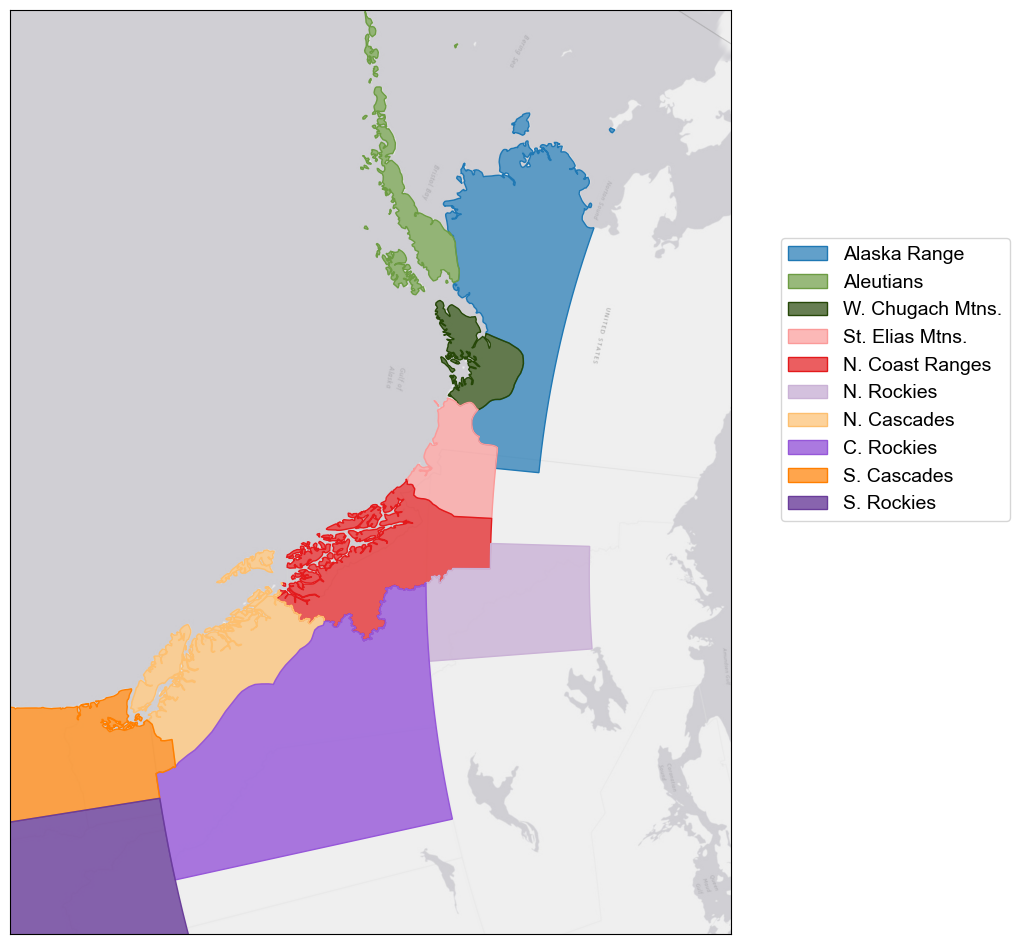

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/rgi_o2regions.png


In [ ]:
# Plot just o2regions
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
crs = 'EPSG:9822' # Albers Equal Conic projection
rgi_reproj = rgi.to_crs(crs)

# iterate over subregions
i=0
for o1region, o2region in unique_subregions:
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # plot subregion outline
    rgi_subregion = rgi_reproj.loc[(rgi_reproj['o1region']==o1region) & (rgi_reproj['o2region']==o2region)].reset_index(drop=True)
    if type(rgi_subregion.geometry[0])==Polygon:
        ax.fill(*rgi_subregion.geometry[0].exterior.coords.xy, facecolor=matplotlib.colors.to_rgba(color, alpha=0.8),
                edgecolor=color, label=subregion_name)
    elif type(rgi_subregion.geometry[0])==MultiPolygon:
        for j, geom in enumerate(rgi_subregion.geometry[0].geoms):
            if j==0:
                label=subregion_name
            else:
                label='_nolegend_'
            ax.fill(*geom.exterior.coords.xy, facecolor=matplotlib.colors.to_rgba(color, alpha=0.7),
                    edgecolor=color, label=label)
    i+=1

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-5200000, -2000000)
ax.set_ylim(6700000, 10800000)
ax.set_ylim()
# add basemap
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldGrayCanvas, crs=crs, attribution=False)
# add legend
ax.legend(loc='center right', bbox_to_anchor=[1.2, 0.5, 0.2, 0.2])
plt.show()

# save figure
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'rgi_o2regions.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

In [ ]:
# ax.legend(loc='center right', bbox_to_anchor=[1.0, 0.5, 0.2, 0.2])


/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_74474/3295898182.py:2: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.get_legend_handles_labels()


([], [])

## Normalized distribution of terrain parameters w.r.t. all sites in RGI regions 1 and 2

In [ ]:
# -----Plot distribution of terrain parameters for all glaciers and completed glaciers in each subregion
# Add column for subregion name
aois['Subregion'] = ''
rgis['Subregion'] = ''
for o1region, o2region in rgis[['O1Region', 'O2Region']].drop_duplicates().values:
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region), 'Subregion'] = subregion_name
    rgis.loc[(rgis['O1Region']==o1region) & (rgis['O2Region']==o2region), 'Subregion'] = subregion_name
# define columns and plot settings
columns = ['Aspect', 'Slope', '']
column_units = [' [degrees]', ' [degrees]', '']
colors = ['#00441b', '#993404', '#4d004b']
ylabels = ['Normalized density', 'Normalized density', 'Area [km$^2$]']

# Set up figure
fontsize = 14
plt.rcParams.update({'font.size': fontsize, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(1, 3, figsize=(16,6))
# ax = [fig.add_axes([0.01, 0.5, 0.4, 0.4]), fig.add_axes([0.55, 0.5, 0.4, 0.4]),
#       fig.add_axes([0.01, 0.01, 0.4, 0.4]), fig.add_axes([0.55, 0.01, 0.4, 0.4])]
alpha1 = 0.4 # transparency for RGI Distributions
alpha2 = 0.7 # tranparency for Sampled Sites

# Iterate over columns
for column, column_unit, color, ylabel, i in list(zip( columns, column_units, colors, ylabels, np.arange(0,len(columns)) )):
    # Subregion area totals
    if i==2:
        # initialize bin values
        rgi_counts = np.zeros(len(bins))
        aoi_counts = np.zeros(len(bins))
        # define bin widths and centers
        bins = np.arange(0,len(rgis['Subregion'].drop_duplicates().values))
        bin_centers = np.arange(0,len(bins)) + 0.5
        bin_widths = np.ones(len(bins))
        # calculate total area in each subregion
        for j, subregion in enumerate(rgis['Subregion'].drop_duplicates().values):
            rgi_counts[j] = rgis.loc[rgis['Subregion']==subregion, 'Area'].sum()
            aoi_counts[j] = aois.loc[aois['Subregion']==subregion, 'Area'].sum()
        ax[i].bar(bin_centers, rgi_counts, width=bin_widths[0],
                  facecolor=matplotlib.colors.to_rgba(color, alpha=alpha1), edgecolor='white')
        ax[i].bar(bin_centers, aoi_counts, width=bin_widths[0], facecolor=color, alpha=alpha2, edgecolor='white')
        ax[i].set_xlim(0, bin_centers[-1] + bin_widths[-1]/2)
        ax[i].set_ylim(0, np.nanmax(rgi_counts)*1.02)
        ax[i].set_xticks(bins)
    else:
        if column=='Slope':
            range = (0,50)
        else:
            range = (np.min(rgis[column].values), np.max(rgis[column].values))
        ax[i].hist(rgis[column].values, bins=10, density=True, range=range,
                   color=color, alpha=alpha1, edgecolor='w', label='RGI Distribution')
        ax[i].hist(aois[column].values, bins=10, density=True, range=range,
                   color=color, alpha=alpha2, edgecolor='w', label='Sampled Sites')

    # Add axes labels
    ax[i].set_ylabel(ylabel)
    ax[i].set_xlabel(column + column_unit)

# Add subregion names to last subplot
ax[2].set_xticks(np.arange(0,len(rgis['Subregion'].drop_duplicates().values)+1))
ax[2].set_xticklabels([])
ax[2].set_xticks(ax[2].get_xticks()[0:-1] + 0.5, minor=True)
ax[2].set_xticklabels(rgis['Subregion'].drop_duplicates().values, minor=True, rotation=90)
ax[2].tick_params(which='minor', length=0)

# Add legend
ax[1].legend(loc='upper center', bbox_to_anchor=[0.4, 1., 0.2, 0.2], ncols=2)
leg = ax[1].get_legend()
leg.legendHandles[0].set_color([0,0,0,alpha1])
leg.legendHandles[1].set_color([0,0,0,alpha2])

fig.tight_layout()
plt.show()

# save figure
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'study_sites_terrain_parameters.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

NameError: name 'aois' is not defined

In [ ]:
# Calculate total percent area sampled
print('Total area in RGI regions 1 and 2 = ', rgis['Area'].sum(), ' km^2')
print('Total area sampled = ', aois['Area'].sum(), ' km^2')
print('Percent sampled = ', np.round((aois['Area'].sum() / rgis['Area'].sum()) * 100, 2), '%')

### Plot all AARs, ELAs from AARs, and median snowline elevations on one figure with colors distinguishing subregions

In [ ]:
plt.rcParams.update({'font.size':16})
fig1, ax1 = plt.subplots(1,1,figsize=(16,8)) # AARs
fig2, ax2 = plt.subplots(1,1,figsize=(16,8)) # ELAs from AARs

# iterate over unique subregions
i=0
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # iterate over AOIs in subregion
    for j in range(0, len(aois_subregion)):
        # plot dummy point for legend
        if j==0:
            label = subregion_name + ' (N=' + str(len(aois_subregion)) + ')'
            ax1.plot(np.datetime64('2000-01-01'),
                     snowlines_subregion['AAR'].values[0], 'o',
                     markeredgewidth=3, markeredgecolor=color, markerfacecolor='None',
                     markersize=10, label=label)
            ax2.plot(np.datetime64('2000-01-01'),
                     snowlines_subregion['ELA_from_AAR_m'].values[0], 'o',
                     markeredgewidth=3, markeredgecolor=color, markerfacecolor='None',
                     markersize=10, label=label)
        # plot time series
        ax1.plot(snowlines_subregion['Date'],
                 snowlines_subregion['AAR'], 'o',
                 markeredgecolor=color, markerfacecolor='None', markersize=2)
        ax2.plot(snowlines_subregion['Date'],
                 snowlines_subregion['ELA_from_AAR_m'], 'o',
                 markeredgecolor=color, markerfacecolor='None', markersize=2)

    i+=1

# adjust axes
for ax in [ax1, ax2]:
    ax.grid()
    ax.set_xlim(np.datetime64('2013-04-01'), np.datetime64('2023-11-01'))
    ax.legend(loc='center left', bbox_to_anchor=[1.0, 0.4, 0.2, 0.2])
ax1.set_ylabel('AAR')
ax2.set_ylabel('ELA from AAR [m]')
plt.show()

# save figure
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_ELAs_from_AARs.png')
    fig2.savefig(fig2_fn, dpi=300, bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)

## Plot median monthly trends for each subregion

In [ ]:
# -----Set up figures
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(6, 2, figsize=(20, 20))  # AARs
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(6, 2, figsize=(20, 20))  # ELAs from AARs
ax2 = ax2.flatten()
alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# -----Iterate over subregions
for o1region, o2region in unique_subregions:

    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

    # determine which axis to plot on
    if (o1region==1) and (o2region==2):
        j = 1
    elif (o1region==1) and (o2region==3):
        j = 0
    elif (o1region==1) and (o2region==4):
        j = 2
    elif (o1region==1) and (o2region==5):
        j = 4
    elif (o1region==1) and (o2region==6):
        j = 6
    elif (o1region==2) and (o2region==1):
        j = 7
    elif (o1region==2) and (o2region==2):
        j = 8
    elif (o1region==2) and (o2region==3):
        j = 9
    elif (o1region==2) and (o2region==4):
        j = 10
    elif (o1region==2) and (o2region==5):
        j = 11

    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Extract the week of the year and calculate median and IQR
    snowlines_subregion.index = snowlines_subregion.Date
    # iterate over columns
    for ax, column in list(zip([ax1, ax2], ['AAR', 'ELA_from_AAR_m'])):
        # calculate monthly median trend
        monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)[column].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
        monthly.columns = ['Median', 'Q1', 'Q3']  # Rename the columns for clarity
        # plot
        ax[j].fill_between(monthly.index, monthly['Q1'], monthly['Q3'], color=color, alpha=alpha)
        ax[j].plot(monthly.index, monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
        ax[j].set_xticks([5, 7, 9])
        ax[j].set_xticklabels(['May', 'July', 'Sept'])
        # ax[i].legend(loc='center left', bbox_to_anchor=[1.0, 0.4, 0.2, 0.2])
        ax[j].grid(True)

    # -----Adjust individual axes
    # AARs
    ax1[j].set_ylim(0,1)
    ax1[j].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax1[j].set_yticklabels(['0.0', '', '0.5', '', '1.0'])
    ax1[j].text((ax1[j].get_xlim()[1] - ax1[j].get_xlim()[0])*0.05 + ax1[j].get_xlim()[0],
                (ax1[j].get_ylim()[1] - ax1[j].get_ylim()[0])*0.10 + ax1[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # ELAs
    ax2[j].text((ax2[j].get_xlim()[1] - ax2[j].get_xlim()[0])*0.05 + ax2[j].get_xlim()[0],
                (ax2[j].get_ylim()[1] - ax2[j].get_ylim()[0])*0.90 + ax2[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    if j==4:
        ax1[j].set_ylabel('Accumulation area ratio')
        ax2[j].set_ylabel('Equilibrium line altitude [m]')

# remove empty axes
for fig, ax in list(zip([fig1, fig2], [ax1, ax2])):
    fig.delaxes(ax[3])
    fig.delaxes(ax[5])

plt.show()

# -----Save figures
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_monthly_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_monthly_ELAs.png')
    fig2.savefig(fig2_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)

## Plot weekly median trends for each subregion separately

In [ ]:
# -----Set up figures
plt.rcParams.update({'font.size':18, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(6, 2, figsize=(20, 20))  # AARs
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(6, 2, figsize=(20, 20))  # ELAs from AARs
ax2 = ax2.flatten()
fig3, ax3 = plt.subplots(6, 2, figsize=(20, 20))  # cumulative PDDs
ax3 = ax3.flatten()
alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# -----Iterate over subregions
min_aars_df, max_elas_df = pd.DataFrame(), pd.DataFrame()
for o1region, o2region in unique_subregions:

    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

    # determine which axis to plot on
    if (o1region==1) and (o2region==2):
        j = 1
    elif (o1region==1) and (o2region==3):
        j = 0
    elif (o1region==1) and (o2region==4):
        j = 2
    elif (o1region==1) and (o2region==5):
        j = 4
    elif (o1region==1) and (o2region==6):
        j = 6
    elif (o1region==2) and (o2region==1):
        j = 7
    elif (o1region==2) and (o2region==2):
        j = 8
    elif (o1region==2) and (o2region==3):
        j = 9
    elif (o1region==2) and (o2region==4):
        j = 10
    elif (o1region==2) and (o2region==5):
        j = 11

    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Set datetime as index
    snowlines_subregion.index = snowlines_subregion.Date
    # add week of year column
    snowlines_subregion['Week'] = snowlines_subregion['Date'].dt.isocalendar().week
    # iterate over columns
    for ax, column in list(zip([ax1, ax2, ax3], ['AAR', 'ELA_from_AAR_m', 'Cumulative_Positive_Degree_Days'])):
        # calculate weekly trends
        weekly = snowlines_subregion.groupby(by='Week')[column].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
        weekly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity
        weekly.index = weekly.index.astype(float)
        # plot
        ax[j].fill_between(weekly.index, weekly['Q1'], weekly['Q3'], color=color, alpha=alpha)
        ax[j].plot(weekly.index, weekly['Median'], color=color, linewidth=linewidth, label=subregion_name)
        ax[j].set_xticks([18, 27, 36, 44])
        ax[j].set_xticklabels(['May', 'July', 'Sep', 'Nov'])
        ax[j].grid(True)
        # compile maximums in dataframe
        if column=='AAR':
            min_aar_df = pd.DataFrame({'Subregion': [subregion_name],
                                       'Week': weekly.loc[weekly['Median']==weekly['Median'].min()].index.values,
                                       'AAR min': weekly.loc[weekly['Median']==weekly['Median'].min()]['Median'].values,
                                       'Q1': weekly.loc[weekly['Median']==weekly['Median'].min()]['Q1'].values,
                                       'Q3': weekly.loc[weekly['Median']==weekly['Median'].min()]['Q3'].values,
                                       'Color': color
                                      })
            min_aars_df = pd.concat([min_aars_df, min_aar_df])
        elif column=='ELA_from_AAR_m':
            max_ela_df = pd.DataFrame({'Subregion': [subregion_name],
                                       'Week': weekly.loc[weekly['Median']==weekly['Median'].max()].index.values,
                                       'ELA max': weekly.loc[weekly['Median']==weekly['Median'].max()]['Median'].values,
                                       'Q1': weekly.loc[weekly['Median']==weekly['Median'].max()]['Q1'].values,
                                       'Q3': weekly.loc[weekly['Median']==weekly['Median'].max()]['Q3'].values,
                                       'Color': color
                                      })
            max_elas_df = pd.concat([max_elas_df, max_ela_df])

    # -----Adjust individual axes
    # AARs
    ax1[j].set_ylim(0,1)
    ax1[j].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax1[j].set_yticklabels(['0.0', '', '0.5', '', '1.0'])
    ax1[j].text((ax1[j].get_xlim()[1] - ax1[j].get_xlim()[0])*0.05 + ax1[j].get_xlim()[0],
                (ax1[j].get_ylim()[1] - ax1[j].get_ylim()[0])*0.10 + ax1[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # ELAs
    ax2[j].text((ax2[j].get_xlim()[1] - ax2[j].get_xlim()[0])*0.05 + ax2[j].get_xlim()[0],
                (ax2[j].get_ylim()[1] - ax2[j].get_ylim()[0])*0.85 + ax2[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # PDD sums
    ax3[j].set_ylim(0,1500)
    ax3[j].set_yticks(np.arange(0, 1501, step=500))
    ax3[j].text((ax3[j].get_xlim()[1] - ax3[j].get_xlim()[0])*0.05 + ax3[j].get_xlim()[0],
                (ax3[j].get_ylim()[1] - ax3[j].get_ylim()[0])*0.85 + ax3[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    if j==4:
        ax1[j].set_ylabel('Accumulation area ratio')
        ax2[j].set_ylabel('Equilibrium line altitude [m]')
        ax3[j].set_ylabel('$\Sigma$ PDDs')

# remove empty axes
for fig, ax in list(zip([fig1, fig2, fig3], [ax1, ax2, ax3])):
    fig.delaxes(ax[3])
    fig.delaxes(ax[5])

plt.show()

# -----Save figures
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_weekly_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_weekly_ELAs.png')
    fig2.savefig(fig2_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)
    fig3_fn = os.path.join(figures_out_path, 'timeseries_weekly_PDD_sums.png')
    fig3.savefig(fig3_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 3 saved to file: ' + fig3_fn)

In [ ]:
# plot maximum values
min_aars_df.reset_index(drop=True, inplace=True)
max_elas_df.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(12,10))
for subregion in min_aars_df['Subregion'].values:
    min_aars_subregion = min_aars_df.loc[min_aars_df['Subregion']==subregion]
    ax[0].plot(min_aars_subregion['Week'], min_aars_subregion['AAR min'],
               'o', markersize=15, markeredgecolor=min_aars_subregion['Color'].values[0],
               markerfacecolor='None', markeredgewidth=3, label=subregion)
    max_elas_subregion = max_elas_df.loc[max_elas_df['Subregion']==subregion]
    ax[1].plot(max_elas_subregion['Week'], max_elas_subregion['ELA max'],
               'o', markersize=15, markeredgecolor=min_aars_subregion['Color'].values[0],
               markerfacecolor='None', markeredgewidth=3, label=subregion)

xmin, xmax = 28, 40
ax[0].set_ylabel('Minimum AAR')
ax[0].grid()
ax[0].set_xlim(xmin, xmax)
ax[1].set_ylabel('Maximum ELA [m]')
ax[1].grid()
ax[1].set_xlim(xmin, xmax)
handles, labels = ax[1].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', bbox_to_anchor=[0.98, 0.4, 0.2, 0.2])

plt.show()

In [ ]:
max_elas_df

In [ ]:
min_aars_df

In [ ]:
# -----Plot AAR & snowline timeseries for each subregion separately
plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(len(unique_subregions), 2, gridspec_kw={'width_ratios':[4,1]}, figsize=(20,44))
fig2, ax2 = plt.subplots(len(unique_subregions), 2, gridspec_kw={'width_ratios':[4,1]}, figsize=(20,44))

alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# grab unique subregions
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
# iterate over unique subregions
i=0
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

     # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]

    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Extract the week of the year and calculate median and IQR
    snowlines_subregion.index = snowlines_subregion['Date']
    # median snowline elevations
    snowlines_monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)['ELA_from_AAR_m'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
    snowlines_monthly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity
    # AAR
    AAR_monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)['AAR'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
    AAR_monthly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity

    # -----Plot results
    # median snowline elevations
    ax1[i,0].plot(snowlines_subregion['Date'], snowlines_subregion['ELA_from_AAR_m'], '.', color=color)
    ax1[i,0].grid()
    ax1[i,0].set_title(subregion_name + ' (N=' + str(len(snowlines_subregion['site_name'].drop_duplicates())) + ')')
    ax1[i,1].fill_between(snowlines_monthly.index, snowlines_monthly['Q1'], snowlines_monthly['Q3'], color=color, alpha=alpha)
    ax1[i,1].plot(snowlines_monthly.index, snowlines_monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
    ax1[i,1].grid()
    ax1[i,1].set_xticks([5, 8, 10])
    ax1[i,1].set_xticklabels(['May', 'Aug', 'Oct'])
    # AAR
    ax2[i,0].plot(snowlines_subregion['Date'], snowlines_subregion['AAR'], '.', color=color)
    ax2[i,0].grid()
    ax2[i,0].set_title(subregion_name + ' (N=' + str(len(snowlines_subregion['site_name'].drop_duplicates())) + ')')
    ax2[i,1].fill_between(AAR_monthly.index, AAR_monthly['Q1'], AAR_monthly['Q3'], color=color, alpha=alpha)
    ax2[i,1].plot(AAR_monthly.index, AAR_monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
    ax2[i,1].grid()
    ax2[i,1].set_xticks([5, 8, 10])
    ax2[i,1].set_xticklabels(['May', 'Aug', 'Oct'])

    i+=1

fig1.suptitle('Equilibrium line altitude [m]', y=0.9)
fig2.suptitle('Accumulation area ratios', y=0.9)

plt.show()

# -----Save figures
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'time_series_ELAs.png')
    fig1.savefig(fig1_fn, dpi=300, bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'time_series_AARs.png')
    fig2.savefig(fig2_fn, dpi=300, bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)

## Plot timeseries with colors distinguishing terrain parameters

In [ ]:
# plot each subregion with colors differentiating aspect
import matplotlib
# define colormap for aspect
cmap = plt.cm.twilight_shifted

# iterate over unique subregions
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)]
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # set up figure
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    # iterate over ids
    for ID in ids_subregion.values:
        site_aspect = aois.loc[aois['RGIId']==ID]['Aspect'].values[0]
        site_snowlines = training_data_df.loc[training_data_df['site_name']==ID]
        # plot
        ax.plot(site_snowlines['Date'], site_snowlines['AAR'],
                'o', markerfacecolor=cmap(site_aspect/360), markeredgecolor='k', markersize=5)
        ax.set_ylabel('Accumulation area ratio')
        ax.grid(True)
        ax.set_xlim(np.datetime64('2013-05-01'), np.datetime64('2022-12-01'))
    # add colorbar
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    ax.set_title(subregion_name)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=360), cmap=cmap),
                 ax=ax, label='Aspect [degrees]', shrink=0.75)
    plt.show()

    # save figure
    if save_figures:
        fig_fn = os.path.join(figures_out_path, 'snowline_time_series_' + subregion_name + '_aspect.png')
        fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
        print('figure saved to file: ' + fig_fn)


## Calculate correlation coefficients between sites for the AAR and median snowline elevations

In [ ]:
# -----Grab list of unique sites
unique_site_names = sorted(training_data_df['site_name'].drop_duplicates().values)
print('Number of unique sites = ' + str(len(unique_site_names)))
unique_site_names

In [ ]:
# -----All sites
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
training_data_df.index = training_data_df['Date']

correlation_all_sites = []
for i in tqdm(range(0, len(unique_site_names))):

    site1_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[i]]
    site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

    for j in range(i+1, len(unique_site_names)):

        site2_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[j]]
        site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

        # resample both dataframes at a daily time interval
        site1_df = site1_df.resample('1D').bfill()
        site2_df = site2_df.resample('1D').bfill()
        min_date = np.min([site1_df.iloc[0]['Date'], site2_df.iloc[0]['Date']])
        max_date = np.max([site1_df.iloc[-1]['Date'], site2_df.iloc[-1]['Date']])
        site1_df = site1_df.loc[(site1_df['Date'] >= min_date) & (site1_df['Date'] <= max_date)]
        site2_df = site2_df.loc[(site2_df['Date'] >= min_date) & (site2_df['Date'] <= max_date)]

        # calculate correlation coefficient
        aar_correlation = pd.DataFrame({'Site1': site1_df['AAR'],
                                        'Site2': site2_df['AAR']}).corr().iloc[0,1]
        snowline_correlation = pd.DataFrame({'Site1': site1_df['ELA_from_AAR_m'],
                                             'Site2': site2_df['ELA_from_AAR_m']}).corr().iloc[0,1]
        correlation_all_sites.append({'Site1': unique_site_names[i],
                                      'Site2': unique_site_names[j],
                                      'AAR Correlation': aar_correlation,
                                      'ELA Correlation': snowline_correlation})

correlation_df = pd.DataFrame(correlation_all_sites)

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'),
            ax=ax[0], cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
ax[0].set_title('AAR')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'),
            ax=ax[1], cmap='coolwarm', vmin=-1, vmax=1)
ax[1].set_title('ELA')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
fig.tight_layout()
plt.show()

# save figure
fig_fn = os.path.join(figures_out_path, 'corrcoeffs_heatmap_all_sites.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)

# print correlation coefficient statistics
print('AAR Correlation Coefficients:')
print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation').values),
                                               nan_policy='omit')) )
print('ELA Correlation Coefficients:')
print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation').values),
                                               nan_policy='omit')))


In [ ]:
# -----For individual subregions
correlation_full_df = pd.DataFrame()
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
training_data_df.index = training_data_df['Date']

for o1region, o2region in unique_subregions:

    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    print(subregion_name)

    # grab list of unique sites in subregion
    unique_site_names_subregion = sorted(snowlines_subregion['site_name'].drop_duplicates().values)
    print('Number of sites = ' + str(len(unique_site_names_subregion)))

    correlation_subregion = []
    for i in tqdm(range(0, len(unique_site_names_subregion))):

        site1_df = snowlines_subregion.loc[snowlines_subregion['site_name']==unique_site_names_subregion[i]]
        site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

        for j in range(i+1, len(unique_site_names_subregion)):

            site2_df = snowlines_subregion.loc[snowlines_subregion['site_name']==unique_site_names_subregion[j]]
            site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

            # resample both dataframes at a daily time interval
            site1_df = site1_df.resample('1D').bfill()
            site2_df = site2_df.resample('1D').bfill()
            min_date = np.min([site1_df.iloc[0]['Date'], site2_df.iloc[0]['Date']])
            max_date = np.max([site1_df.iloc[-1]['Date'], site2_df.iloc[-1]['Date']])
            site1_df = site1_df.loc[(site1_df['Date'] >= min_date) & (site1_df['Date'] <= max_date)]
            site2_df = site2_df.loc[(site2_df['Date'] >= min_date) & (site2_df['Date'] <= max_date)]

            # calculate correlation coefficient
            aar_correlation = pd.DataFrame({'Site1': site1_df['AAR'],
                                            'Site2': site2_df['AAR']}).corr().iloc[0,1]
            ela_correlation = pd.DataFrame({'Site1': site1_df['ELA_from_AAR_m'],
                                            'Site2': site2_df['ELA_from_AAR_m']}).corr().iloc[0,1]
            pdd_correlation = pd.DataFrame({'Site1': site1_df['Cumulative_Positive_Degree_Days'],
                                            'Site2': site2_df['Cumulative_Positive_Degree_Days']}).corr().iloc[0,1]
            snowfall_correlation = pd.DataFrame({'Site1': site1_df['Cumulative_Snowfall_mwe'],
                                                 'Site2': site2_df['Cumulative_Snowfall_mwe']}).corr().iloc[0,1]
            correlation_subregion.append({'Site1': unique_site_names_subregion[i],
                                          'Site2': unique_site_names_subregion[j],
                                          'AAR Correlation': aar_correlation,
                                          'ELA Correlation': ela_correlation,
                                          'PDD Correlation': pdd_correlation,
                                          'Snowfall Correlation': snowfall_correlation
                                         })

    # convert list to pandas.DataFrame
    correlation_df = pd.DataFrame(correlation_subregion)
    mean_aar_correlations = correlation_df['AAR Correlation'].dropna().values
    mean_ela_correlations = correlation_df['ELA Correlation'].dropna().values
    mean_pdd_correlations = correlation_df['PDD Correlation'].dropna().values
    mean_snowfall_correlations = correlation_df['Snowfall Correlation'].dropna().values
    # concatenate mean regional statistics with full correlation df
    correlation_mean_df = pd.DataFrame({'Subregion': [subregion_name],
                                        'Mean AAR Correlation': [mean_aar_correlations],
                                        'Mean ELA Correlation': [mean_ela_correlations],
                                        'Mean PDD Correlation': [mean_pdd_correlations],
                                        'Mean Snowfall Correlation': [mean_snowfall_correlations],
                                        'Color': [color]
                                       })
    correlation_full_df = pd.concat([correlation_full_df, correlation_mean_df])

    # plot
    if save_figures:
        fig, ax = plt.subplots(1, 4, figsize=(24, 6))
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'),
                    ax=ax[0], cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
        ax[0].set_title('AAR')
        ax[0].set_xlabel('')
        ax[0].set_ylabel('')
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'),
                    ax=ax[1], cmap='coolwarm', vmin=-1, vmax=1)
        ax[1].set_title('ELA')
        ax[1].set_xlabel('')
        ax[1].set_ylabel('')
        ax[1].set_yticklabels([])
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='PDD Correlation'),
                    ax=ax[2], cmap='coolwarm', vmin=-1, vmax=1)
        ax[2].set_title('PDDs')
        ax[2].set_xlabel('')
        ax[2].set_ylabel('')
        ax[2].set_yticklabels([])
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='Snowfall Correlation'),
                    ax=ax[3], cmap='coolwarm', vmin=-1, vmax=1)
        ax[3].set_title('Snowfall')
        ax[3].set_xlabel('')
        ax[3].set_ylabel('')
        ax[3].set_yticklabels([])
        fig.suptitle(subregion_name)
        fig.tight_layout()
        plt.show()

        # save figure
        fig_fn = os.path.join(figures_out_path, 'corrcoeffs_heatmap_' + subregion_name + '.png')
        fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
        print('figure saved to file: ' + fig_fn)

    # print correlation coefficient statistics
    # print('AAR Correlation Coefficients:')
    # print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation').values),
    #                                                nan_policy='omit')))
    # print('Median Snowline Elevations Correlation Coefficients:')
    # print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation').values),
    #                                                nan_policy='omit')))
    print(' ')



In [ ]:
# Plot boxplots for all regions
correlation_full_df.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 3, figsize=(20,6))
# AAR
bplot = ax[0].boxplot(correlation_full_df['Mean AAR Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'], showfliers=False)
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].grid()
ax[0].set_ylabel('Pearson correlation coefficient')
ax[0].set_title('AAR')
ax[0].set_ylim(-0.1, 1)
print('AAR')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

# PDDs
bplot = ax[1].boxplot(correlation_full_df['Mean PDD Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'], showfliers=False)
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].grid()
ax[1].set_title('$\Sigma$ PDDs')
ax[1].set_ylim(-0.1, 1)
print('PDDs')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

# Snowfall
bplot = ax[2].boxplot(correlation_full_df['Mean Snowfall Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'], showfliers=False)
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
ax[2].grid()
ax[2].set_title('$\Sigma$ Snowfall')
ax[2].set_ylim(-0.1, 1)
print('Snowfall')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

plt.show()

# save figure to file
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'corrcoeffs_boxplots.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

## Calculate correlation coefficients for PDDs and snowfall in each subregion

In [ ]:
# define function to load snowline and ERA data for site
def load_site_data(study_sites_path, site_name):
    # Load snowlines
    snowlines_df = pd.DataFrame()
    snowlines_path = os.path.join(study_sites_path, site_name, 'imagery', 'snowlines')
    snowline_fns = glob.glob(snowlines_path + '/*.csv')
    for snowline_fn in snowline_fns:
        try:
            snowline = pd.read_csv(snowline_fn)
            snowlines_df = pd.concat([snowlines_df, snowline])
        except:
            continue
    snowlines_df['datetime'] = pd.to_datetime(snowlines_df['datetime'], format='mixed')
    snowlines_df['Date'] = snowlines_df['datetime'].values.astype('datetime64[D]')
    # don't include observations from PlanetScope
    snowlines_df = snowlines_df.loc[snowlines_df['dataset'] != 'PlanetScope']

    # load AOI
    if 'RGI' in site_name:
        aoi_fn = site_name + '_outline.shp'
    else:
        aoi_fn = site_name + '_RGI_outline.shp'
    aoi_path = os.path.join(study_sites_path, site_name, 'AOIs')
    aoi = gpd.read_file(os.path.join(aoi_path, aoi_fn))
    subregion_name, color= f.determine_subregion_name_color(float(aoi['O1Region'].values[0]), float(aoi['O2Region'].values[0]))

    # Load ERA data
    era_fns = glob.glob(study_sites_path + site_name + '/ERA/*.csv')
    era_fn = max(era_fns, key=os.path.getctime)
    era = pd.read_csv(era_fn)
    era.reset_index(drop=True, inplace=True)
    era['Date'] = pd.to_datetime(era['Date'])
    era['Date'] = era['Date'].values.astype('datetime64[D]')

    # Merge ERA and snowlines
    df = pd.merge(snowlines_df, era, on='Date')
    columns = ['site_name', 'Date', 'snowline_elevs_median_m', 'SCA_m2', 'AAR', 'ELA_from_AAR_m',
               'Cumulative_Positive_Degree_Days', 'Cumulative_Snowfall_mwe']
    df = df[columns]
    df = df.dropna()

    return df, subregion_name, color

# Load all site names in study_sites_path with snowline and ERA data
site_names = sorted(os.listdir(study_sites_path))
site_names = [site_name for site_name in site_names if os.path.exists(os.path.join(study_sites_path, site_name, 'imagery', 'snowlines'))
              and os.path.exists(os.path.join(study_sites_path, site_name, 'ERA'))]

# Initialize data frame for holding correlations
correlation_climate_df = pd.DataFrame()

# Iterate over site names
for site_name in tqdm(site_names):
    # load data from file
    data_df, subregion_name, color = load_site_data(study_sites_path, site_name)
    # calculate correlation coefficients
    aar_pdd_correlation = data_df[['AAR', 'Cumulative_Positive_Degree_Days']].corr().iloc[0,1]
    aar_snowfall_correlation = data_df[['AAR', 'Cumulative_Snowfall_mwe']].corr().iloc[0,1]
    correlation_df = pd.DataFrame({'site_name': [site_name],
                                   'Subregion': [subregion_name],
                                   'Color': [color],
                                   'AAR-PDD Corr': aar_pdd_correlation,
                                   'AAR-Snowfall Corr': aar_snowfall_correlation})
    correlation_climate_df = pd.concat([correlation_climate_df, correlation_df])

# Adjust dataframe
correlation_climate_df.dropna(inplace=True)
correlation_climate_df.reset_index(drop=True, inplace=True)
# add fake categorical category
subregions = correlation_climate_df['Subregion'].drop_duplicates().reset_index(drop=True)
colors = correlation_climate_df['Color'].drop_duplicates().reset_index(drop=True).values
correlation_climate_df.loc[:,'Category'] = [np.argwhere(x==subregions)[0][0] for x in correlation_climate_df['Subregion'].values]

# Plot results
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
fig, ax = plt.subplots(1,2,figsize=(14,6))
boxwidth = 0.5
order = ['Aleutians', 'Alaska Range', 'W. Chugach Mtns.', 'St. Elias Mtns.', 'N. Coast Ranges',
         'N. Rockies', 'N. Cascades', 'C. Rockies', 'S. Cascades', 'S. Rockies']
# AAR-PDDs
sns.boxplot(data=correlation_climate_df, x='Subregion', y='AAR-PDD Corr',
            width=boxwidth, order=order, palette=colors, ax=ax[0])
ax[0].set_xticklabels(subregions, rotation=90)
ax[0].grid(True)
ax[0].set_ylabel('Pearson correlation coefficient')
ax[0].set_title('AAR - Cumulative PDDs')
# AAR-Snowfall
sns.boxplot(data=correlation_climate_df, x='Subregion', y='AAR-Snowfall Corr',
            width=boxwidth, order=order, palette=colors, ax=ax[1])
ax[1].grid(True)
ax[1].set_xticklabels(subregions, rotation=90)
ax[1].set_title('AAR - Cumulative Snowfall')
plt.show()

# Save figure
fig_fn = os.path.join(figures_out_path, 'aar_climate_corr_coeffs.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)

## Plot some example timeseries to demonstrate correlation analysis

In [ ]:
site1_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[0]]
site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date
site2_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[1]]
site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

# resample both dataframes at a daily time interval
site1_df = site1_df.resample('1D').bfill()
site2_df = site2_df.resample('1D').bfill()
min_date = np.min([site1_df.iloc[0]['datetime'], site2_df.iloc[0]['datetime']])
max_date = np.max([site1_df.iloc[-1]['datetime'], site2_df.iloc[-1]['datetime']])
site1_df = site1_df.loc[(site1_df['datetime'] >= min_date) & (site1_df['datetime'] <= max_date)]
site2_df = site2_df.loc[(site2_df['datetime'] >= min_date) & (site2_df['datetime'] <= max_date)]

plt.rcParams.update({'font.size':12, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(site1_df['datetime'], site1_df['AAR'], '.m', label=unique_site_names[0])
ax.plot(site2_df['datetime'], site2_df['AAR'], '.b', label=unique_site_names[1])
ax.set_ylabel('Accumulation area ratio')
ax.legend()
ax.grid()
plt.show()

In [ ]:
aois.loc[(aois['O1Region']==1) & (aois['O2Region']==2)]

## Plot South Cascade time series with ERA data as example

In [ ]:
site_name = aois.loc[aois['Name']=='South Cascade Glacier WA', 'RGIId'].values[0]
training_data_site_df = training_data_df.loc[training_data_df['site_name']==site_name]

era_fn = glob.glob(os.path.join(study_sites_path, 'SouthCascade', 'ERA', '*.csv'))[0]
era = pd.read_csv(era_fn)
era['Date'] = pd.to_datetime(era['Date'])

In [ ]:
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
# AAR time series
ax[0].plot(training_data_site_df['Date'], training_data_site_df['AAR'], '.k')
ax[0].grid()
ax[0].set_ylabel('AAR')
xmin, xmax = np.datetime64('2016-01-01'), np.datetime64('2023-01-01')
ax[0].set_xlim(xmin, xmax)
ax[0].set_title('South Cascade Glacier')
# PDDs and snowfall
ax[1].bar(era['Date'], era['Cumulative_Snowfall_mwe'], width=2, color='#41b6c4')
ax[1].set_ylabel('$\Sigma$ Snowfall [m.w.e.]', color='#41b6c4', fontweight='bold')
ax[1].tick_params(axis='y', colors='#41b6c4')
ax[1].set_xlim(xmin, xmax)
ax[1].grid()
ax2 = ax[1].twinx()
ax2.plot(era['Date'], era['Cumulative_Positive_Degree_Days'], '.m')
ax2.set_ylabel('$\Sigma$ PDDs', color='m', fontweight='bold')
ax2.tick_params(axis='y', colors='m')

plt.show()

# save to file
fig_fn = os.path.join(figures_out_path, 'example_AAR_climate_timeseries.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)